# Estación Vallecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_47.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,40.419355
2013-02-01,32.096774
2013-03-01,25.000000
2013-04-01,22.709677
2013-05-01,23.032258


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

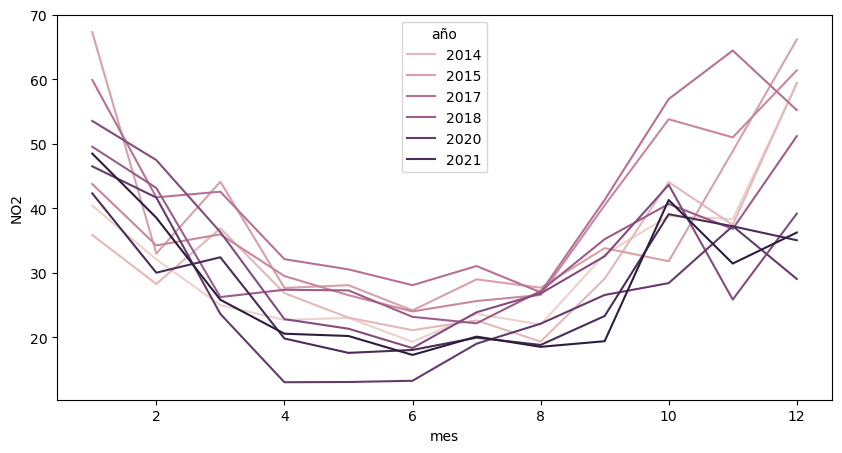

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

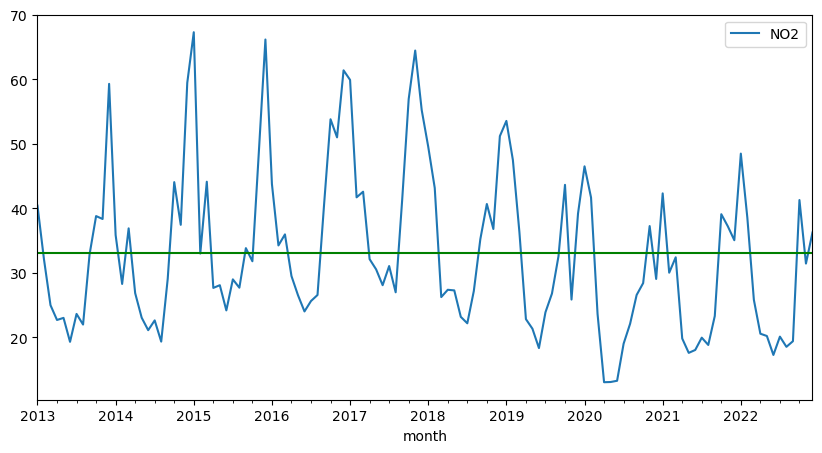

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

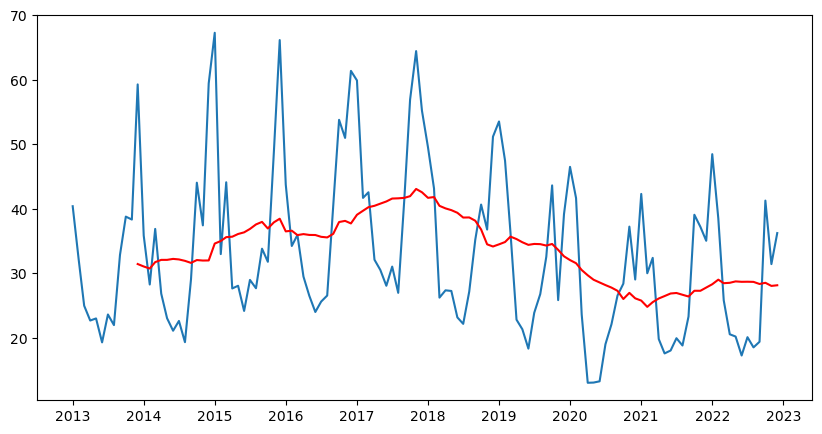

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,40.419355
2013-02-01,32.096774
2013-03-01,25.000000
2013-04-01,22.709677
2013-05-01,23.032258


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,40.419355,2013,1
2013-02-01,32.096774,2013,2
2013-03-01,25.000000,2013,3
2013-04-01,22.709677,2013,4
2013-05-01,23.032258,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,40.419355,2013,1
2013-02-01,32.096774,2013,2
2013-03-01,25.000000,2013,3
2013-04-01,22.709677,2013,4
2013-05-01,23.032258,2013,5


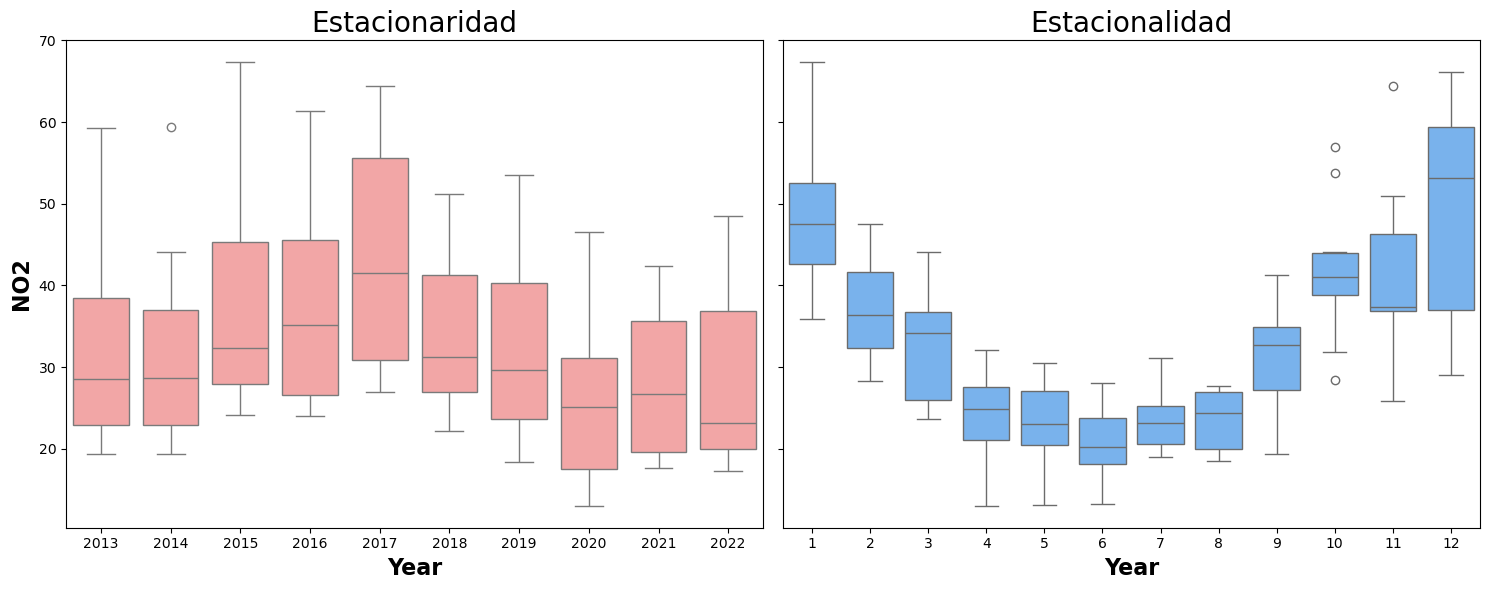

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.5559663014391949,
 0.8806246991300964,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 728.7333623781882)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.5559663014391949
p-value 0.8806246991300964
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6880816276029391
2 mes Lag, 0.4252932761176662
3 mes Lag, 0.15953369084149763
4 mes Lag, -0.1648806950843375
5 mes Lag, -0.3734081269671502
6 mes Lag, -0.4479509522281037
7 mes Lag, -0.39291337660875114
8 mes Lag, -0.2142145408652524
9 mes Lag, 0.09409631864862862
10 mes Lag, 0.3910110730050096
11 mes Lag, 0.6241596788075806
12 mes Lag, 0.7762984999631771
13 mes Lag, 0.6622737696714811
14 mes Lag, 0.3894998075399745
15 mes Lag, 0.11521671517997267
16 mes Lag, -0.20883185302179968
17 mes Lag, -0.42157503771030125
18 mes Lag, -0.5184229986179587
19 mes Lag, -0.47120550997417027
20 mes Lag, -0.256623694242137
21 mes Lag, 0.052813455818827196
22 mes Lag, 0.2966326015377115
23 mes Lag, 0.559080963321723
24 mes Lag, 0.7073016028514378
25 mes Lag, 0.5614729676738923
26 mes Lag, 0.33646798206537526
27 mes Lag, 0.05329244649590981
28 mes Lag, -0.2870324532281314
29 mes Lag, -0.5135471875283215
30 mes Lag, -0.6186184718700225
31 mes Lag, -0.5651226514770311
32 mes Lag

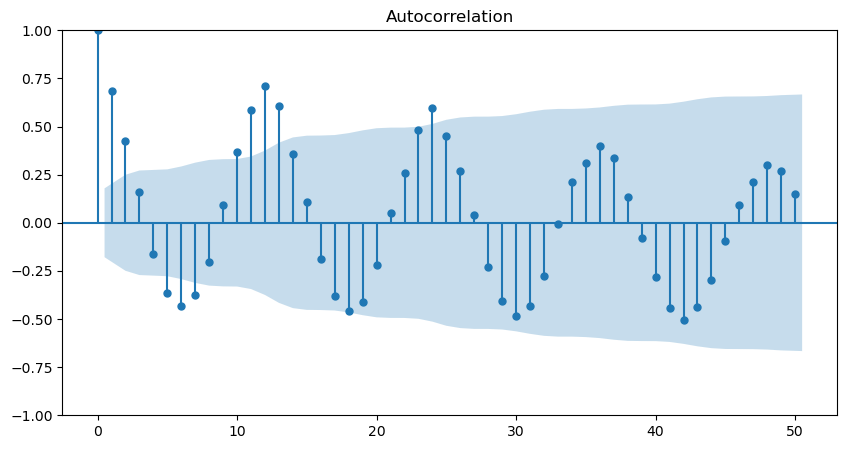

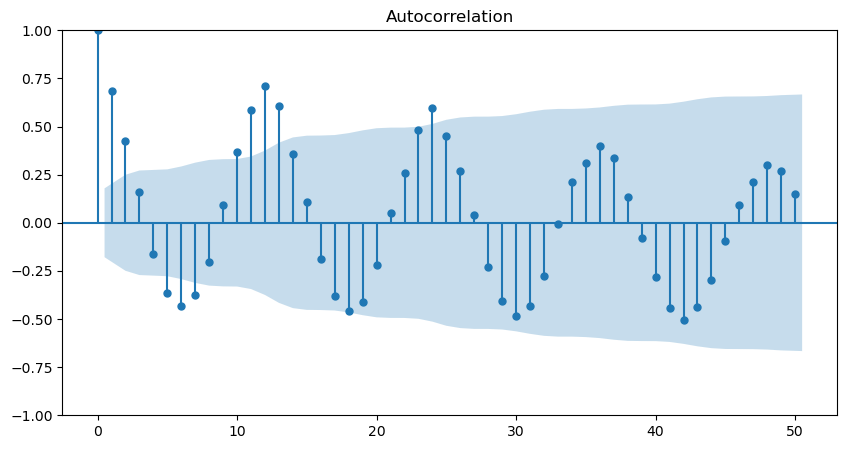

In [19]:
plot_acf(df, lags = 50)

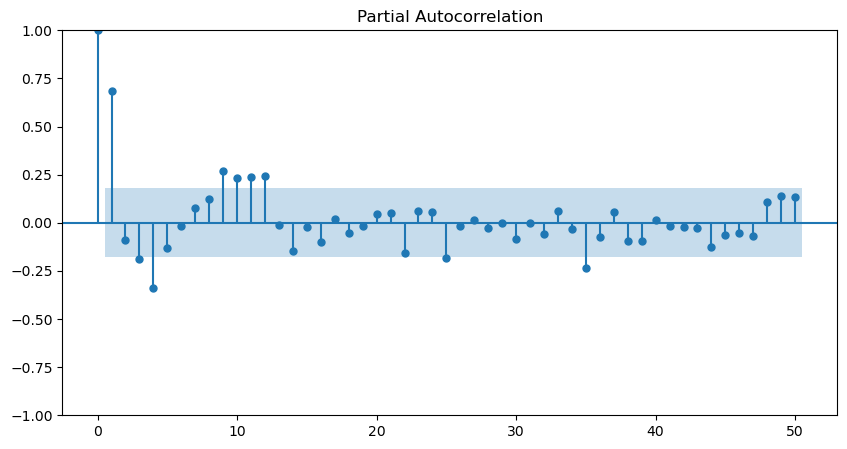

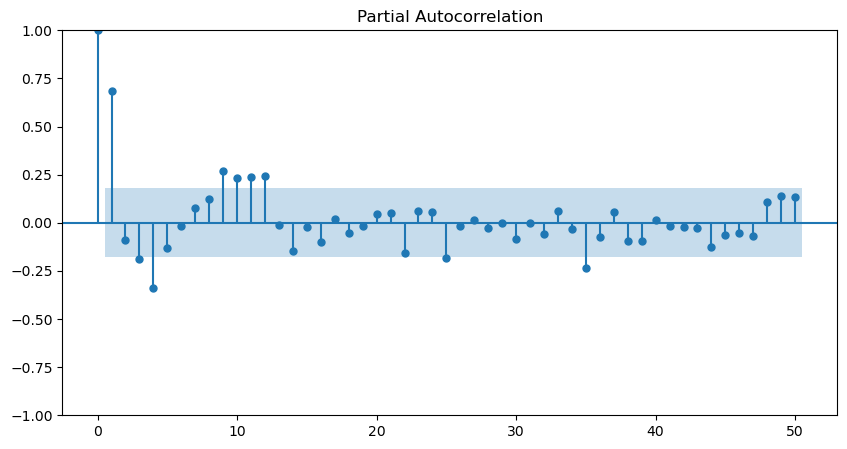

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,40.419355
2013-02-01,32.096774
2013-03-01,25.000000
2013-04-01,22.709677
2013-05-01,23.032258


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 62%|██████▎   | 15/24 [00:00<00:00, 20.42it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 406 ms
Wall time: 1.28 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
14,10.374306,"(2, 1, 2)"
8,10.473232,"(1, 1, 2)"
3,14.607629,"(0, 2, 0)"
9,15.257148,"(1, 2, 0)"
20,16.244310,"(3, 1, 2)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(2, 1, 2),  # modelo arima
               seasonal_order=(2, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  5.327957285828523
CPU times: total: 46.9 ms
Wall time: 614 ms


,real,pred,error
2020-07-01,19.032258,20.102962,1.070704
2020-08-01,22.129032,24.664954,2.535922
2020-09-01,26.580645,33.007973,6.427328
2020-10-01,28.419355,41.601590,13.182235
2020-11-01,37.258065,32.606834,-4.651231
2020-12-01,29.064516,48.334286,19.269770
2021-01-01,42.322581,49.218645,6.896064
2021-02-01,30.032258,41.394649,11.362391
2021-03-01,32.419355,31.461109,-0.958246
2021-04-01,19.838710,20.049467,0.210757


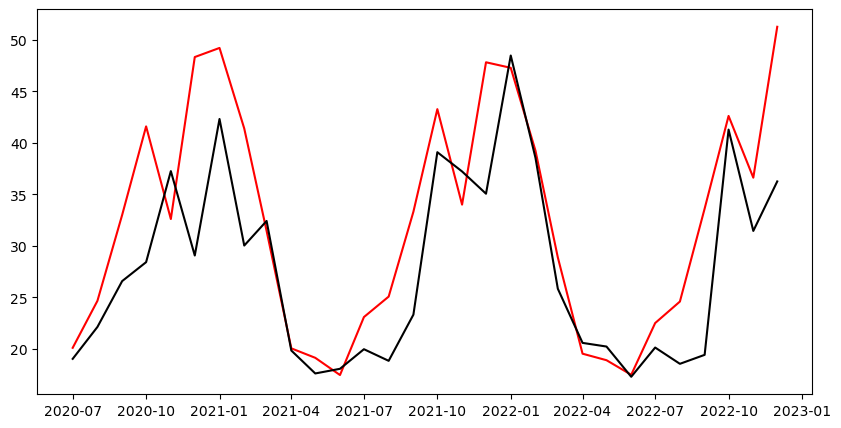

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,48.246651
2023-02-01,39.058567
2023-03-01,31.747753
2023-04-01,22.153609
2023-05-01,21.172767
2023-06-01,19.060645
2023-07-01,23.615224
2023-08-01,24.732576
2023-09-01,33.745913
2023-10-01,43.227189


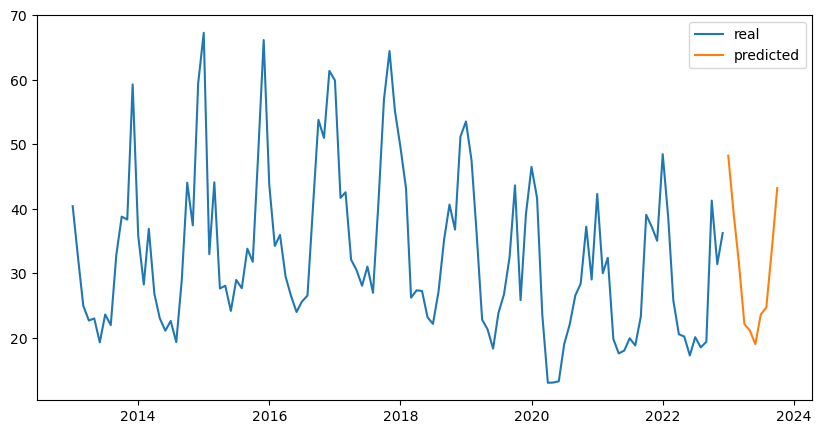

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,48.246651
2023-02-01,39.058567
2023-03-01,31.747753
2023-04-01,22.153609
2023-05-01,21.172767
2023-06-01,19.060645
2023-07-01,23.615224
2023-08-01,24.732576
2023-09-01,33.745913
2023-10-01,43.227189


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 47]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
128,128,47,2023,1,36.000000
129,129,47,2023,2,38.258065
130,130,47,2023,3,30.516129
131,131,47,2023,4,24.000000
132,132,47,2023,5,14.129032
133,133,47,2023,6,20.064516
134,134,47,2023,7,20.741935
135,135,47,2023,8,20.032258
136,136,47,2023,9,29.774194
137,137,47,2023,10,30.838710


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,128,36.000000
2023-02-01,129,38.258065
2023-03-01,130,30.516129
2023-04-01,131,24.000000
2023-05-01,132,14.129032
2023-06-01,133,20.064516
2023-07-01,134,20.741935
2023-08-01,135,20.032258
2023-09-01,136,29.774194


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

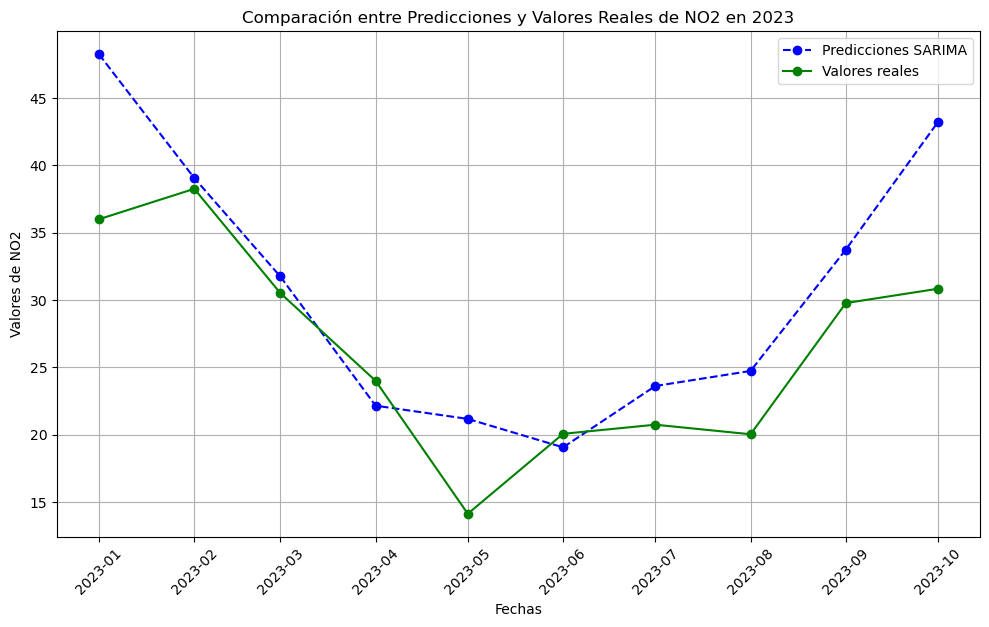

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    36.000000
2023-02-01    38.258065
2023-03-01    30.516129
2023-04-01    24.000000
2023-05-01    14.129032
2023-06-01    20.064516
2023-07-01    20.741935
2023-08-01    20.032258
2023-09-01    29.774194
2023-10-01    30.838710
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,48.246651
2023-02-01,39.058567
2023-03-01,31.747753
2023-04-01,22.153609
2023-05-01,21.172767
2023-06-01,19.060645
2023-07-01,23.615224
2023-08-01,24.732576
2023-09-01,33.745913
2023-10-01,43.227189


In [43]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,36.000000
2023-02-01,38.258065
2023-03-01,30.516129
2023-04-01,24.000000
2023-05-01,14.129032
2023-06-01,20.064516
2023-07-01,20.741935
2023-08-01,20.032258
2023-09-01,29.774194
2023-10-01,30.838710


In [44]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    29.399817
dtype: float64